# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [14]:
import pandas as pd

In [15]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1680992,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197312,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [16]:
densities = []
for i in facts['Pop_2020'].index:
    densities.append(facts['Pop_2020'][i]/facts['Area_tot'][i])

new_facts = facts.assign(Pop_density = densities)
population_density = new_facts.sort_values('Pop_density', ascending=False)

population_density.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Pop_density
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,702455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3895.734463
32,New Jersey,22591,19047,3544,9288994.0,8791894,12,Eastern goldfinch (American goldfinch),Violet,Liberty and Prosperity,...,282090,Jersey City,265549.0,Paterson,145627.0,Elizabeth,128885.0,Edison,100008.0,411.181178
43,Rhode Island,4001,2678,1324,1097379.0,1052567,2,Rhode Island Red,Violet,Hope,...,179883,Cranston,81274.0,Warwick,80847.0,Pawtucket,71847.0,East Providence,47476.0,274.276181
23,Massachusetts,27336,20202,7134,7029917.0,6547629,9,Black-capped chickadee,Mayflower,Ense petit placidam sub libertate quietem,...,692600,Worcester,185877.0,Springfield,155032.0,Cambridge,118977.0,Lowell,111670.0,257.166996
7,Connecticut,14357,12542,1816,3605944.0,3574097,5,American robin,Mountain laurel,Qui transtulit sustinet,...,144900,New Haven,130418.0,Stamford,129775.0,Hartford,122105.0,Waterbury,108093.0,251.162778


In [17]:
facts.loc[(facts['Area_water']- facts['Area_land']) > 0]

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,Dededo,44943,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,Saipan2,48220,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,Charlotte Amalie,18481,Sion Farm,13003.0,Northside,10049.0,East End,5128.0,Southcentral,3277.0


In [18]:
growth = []
for i in facts['Pop_2020'].index:
    growth.append(facts['Pop_2020'][i]-facts['Pop_2010'][i])

growth_facts = facts.assign(Growth = growth)
highest_growth = growth_facts.sort_values('Growth', ascending=False)

highest_growth.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Growth
47,Texas,695662,676587,19075,29145505.0,25145561,38,Northern mockingbird,Bluebonnet sp.,Friendship,...,2325502,San Antonio,1532233.0,Dallas,1356785.0,Austin,978908.0,Fort Worth,902938.0,3999944.0
10,Florida,170312,138887,31424,21538187.0,18801310,28,Northern mockingbird,Orange blossom,In God we trust,...,907953,Miami,476329.0,Tampa,401189.0,Orlando,289191.0,St. Petersburg,265098.0,2736877.0
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,3997984,San Diego,1425976.0,San Jose,1030119.0,San Francisco,884198.0,Fresno,530093.0,2284267.0
11,Georgia,153910,148959,4951,10711908.0,9687653,14,Brown thrasher,Cherokee rose,"Wisdom, Justice, Moderation",...,506811,Augusta,196939.0,Columbus,194160.0,Macon,153095.0,Savannah,147181.0,1024255.0
52,Washington,184661,172119,12542,7705281.0,6724540,10,Willow goldfinch (American goldfinch),Coast rhododendron,Al-ki,...,754567,Spokane,219190.0,Tacoma,216279.0,Vancouver,183012.0,Bellevue,147599.0,980741.0


In [19]:
birds = facts.groupby(by=facts['State_bird']).sum()
birds.sort_values('Pop_2020', ascending=False).head(5)
birds.sort_values('Area_land', ascending=False).head(5)



,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,GDP_2020,GDP_2019,Capital_pop,city_1_pop,city_2_pop,city_3_pop,city_4_pop,city_5_pop
State_bird,,,,,,,,,,,,,
Willow ptarmigan,1723337,1477953,245384,733391.0,710231,50246.7,54385.6,32113,291538,32113.0,31516.0,10529.0,8647.0
Western meadowlark,1232168,1215009,17159,10999959.0,10172539,658087.1,670243.6,694621,1760347,808643.0,493479.0,397113.0,338310.0
Northern mockingbird,1238297,1178574,59722,63567335.0,56176191,3463383.0,3573810.6,2202168,4262215,2818895.0,2087169.0,1575653.0,1454625.0
Northern cardinal,778009,735138,42871,56767817.0,54579806,3332820.6,3403397.6,2667887,6480601,1936610.0,1209191.0,1123638.0,937856.0
Mountain bluebird,502823,498377,4446,4943720.0,4268133,256629.8,261864.9,284875,878835,424083.0,355998.0,309531.0,275719.0


In [20]:
# No data on state capitals

In [21]:
cities = facts[['city_1_pop', 'city_2_pop', 'city_3_pop', 'city_4_pop', 'city_5_pop']]

max_values = cities.max(axis=1)
min_values = cities.min(axis=1)

values = facts.assign(Max_city_pop = max_values, Min_city_pop = min_values)

percents = []

for i in values['city_1_pop'].index:
    percents.append(100*(values['Max_city_pop'][i] - values['Min_city_pop'][i])/(values['Max_city_pop'][i]))

percent_drop = values.assign(Percent_drop = percents)
percent_drop.sort_values('Percent_drop', ascending=False).head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Max_city_pop,Min_city_pop,Percent_drop
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,48220.0,0.0,100.000000
34,New York,141297,122057,19240,20201249.0,19378102,26,Eastern bluebird,Rose,Excelsior!,...,251298.0,Rochester,206284.0,Yonkers,199663.0,Syracuse,142749.0,8879928.0,142749.0,98.392453
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0,291538.0,8647.0,97.034006
15,Illinois,149995,143793,6202,12812508.0,12830632,17,Northern cardinal,Violet,"State sovereignty, national union",...,198187.0,Naperville,148304.0,Joliet,148099.0,Rockford,146526.0,2705994.0,146526.0,94.585132
41,Pennsylvania,119280,115883,3397,13002700.0,12702379,17,Ruffed Grouse,Mountain laurel,"Virtue, Liberty and Independence",...,301048.0,Allentown,126238.0,Erie,96471.0,Reading,88495.0,1587828.0,88495.0,94.426663


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [22]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);

In [42]:
states = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
#states.head(5)
states['Date'] = pd.to_datetime(states['Date'],errors='raise')
merged = pd.merge(facts,states,left_on='USPS_code',right_on='Abbreviation', how='outer')
merged['Date']<pd.datetime(1790,1,1)
old = merged.loc[merged['Date']<pd.datetime(1790,1,1)]
#old.groupby(by='State_flower').count()
#merged.head(5)

/tmp/ipykernel_1469441/182907674.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  merged['Date']<pd.datetime(1790,1,1)
/tmp/ipykernel_1469441/182907674.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  old = merged.loc[merged['Date']<pd.datetime(1790,1,1)]


,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Name,Date,Status,Abbreviation
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0,Alabama,1819-12-14,State,AL
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0,Alaska,1959-01-03,State,AK
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,American Samoa,1900-04-17,Territory,AS
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0,Arizona,1912-02-14,State,AZ
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0,Arkansas,1836-06-15,State,AR


In [38]:
population_density
population_merged = pd.merge(population_density,states,left_on='USPS_code',right_on='Abbreviation', how='outer')
population_merged.head(5)
#for i in population_merged['Name'].index:
population_minimal = population_merged[['State', 'Pop_density', 'Status']]
population_minimal.head(5)
    
#The most dense US territory has the higher population density between it and the least dense US state

,State,Pop_density,Status
0,District of Columbia,3895.734463,Federal District
1,New Jersey,411.181178,State
2,Rhode Island,274.276181,State
3,Massachusetts,257.166996,State
4,Connecticut,251.162778,State


Text(0.5, 0, 'Date')

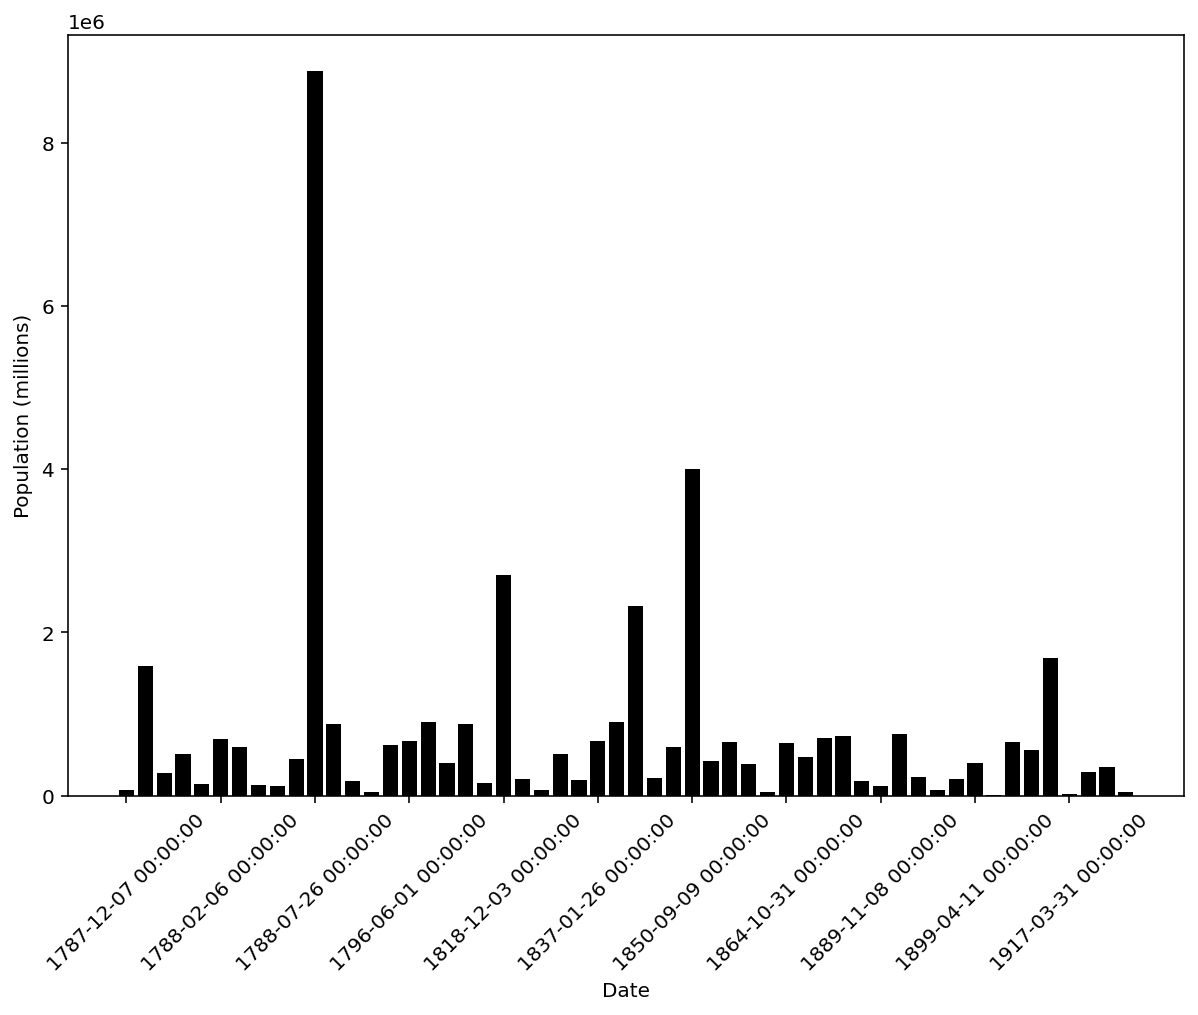

In [148]:
#Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black

import matplotlib.pyplot  as plt
import numpy as np
%config InlineBackend.figure_format ='retina' #This makes your plot clearer

values_merged = pd.merge(values,states,left_on='USPS_code',right_on='Abbreviation', how='outer')


#ld = merged.loc[merged['Date']<pd.datetime(1790,1,1)]
values_sorted = values_merged.sort_values('Date')
#values_sorted.head(5)
dates = []
for i in values_sorted['Date'].index:
    dates.append(str(values_sorted['Date'][i]))

    

fig = plt.figure(figsize =(10, 7))
bar = plt.bar(dates, values_sorted['Max_city_pop'], color='black')
plt.xticks(np.arange(0, 55, step=5), rotation = 45)
plt.ylabel('Population (millions)')
plt.xlabel('Date')


Text(0.5, 0, 'Date')

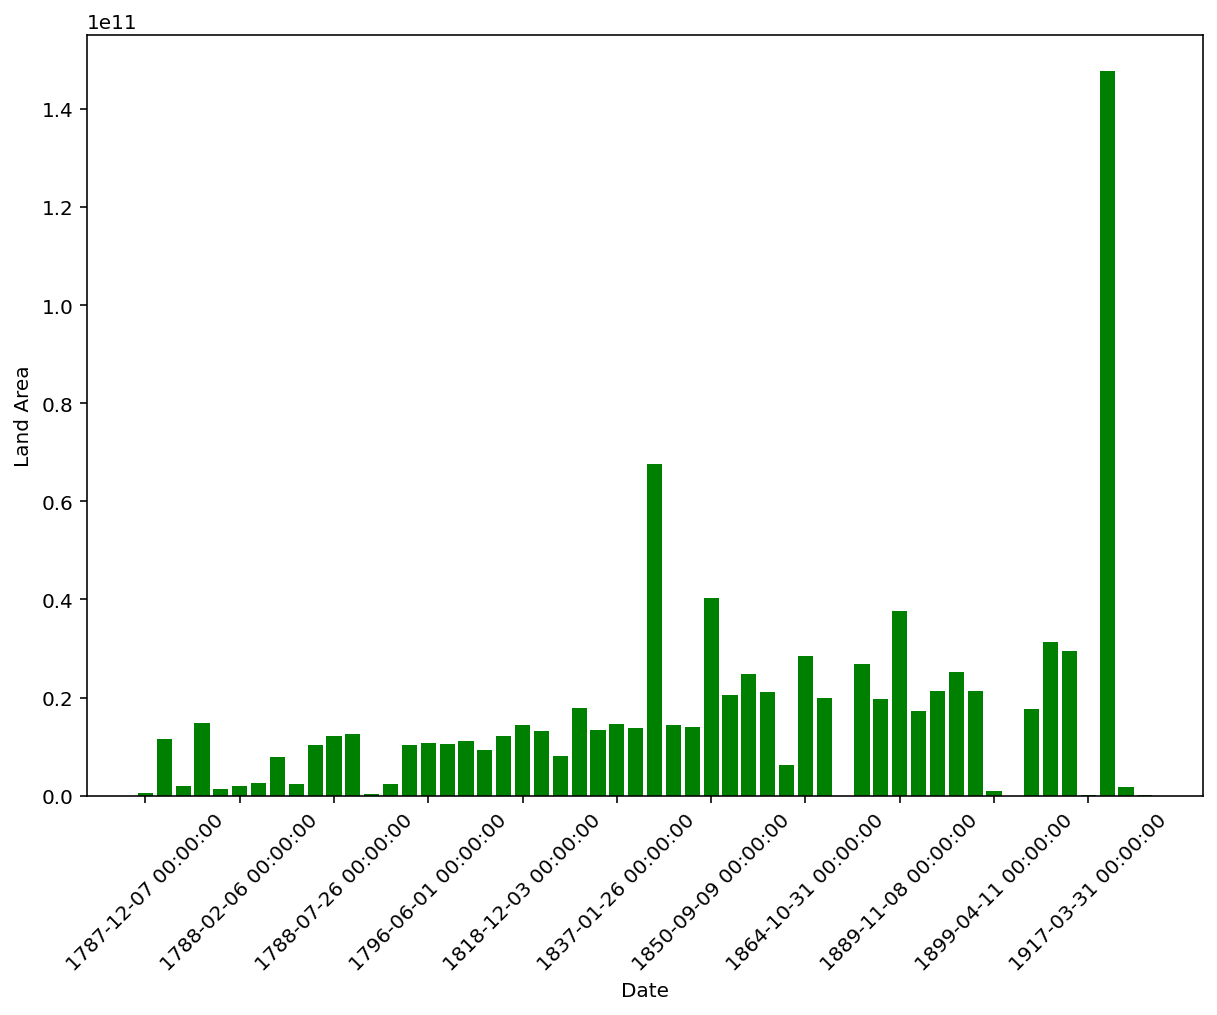

In [150]:
#Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black

import matplotlib.pyplot  as plt
import numpy as np
%config InlineBackend.figure_format ='retina' #This makes your plot clearer

values_merged = pd.merge(values,states,left_on='USPS_code',right_on='Abbreviation', how='outer')


#ld = merged.loc[merged['Date']<pd.datetime(1790,1,1)]
values_sorted = values_merged.sort_values('Date')
#values_sorted.head(5)
dates = []
for i in values_sorted['Date'].index:
    dates.append(str(values_sorted['Date'][i]))

    

fig = plt.figure(figsize =(10, 7))
bar = plt.bar(dates, values_sorted['Area_land'], color='green')
plt.xticks(np.arange(0, 55, step=5), rotation = 45)
plt.ylabel('Land Area')
plt.xlabel('Date')


Text(0.5, 0, 'Date')

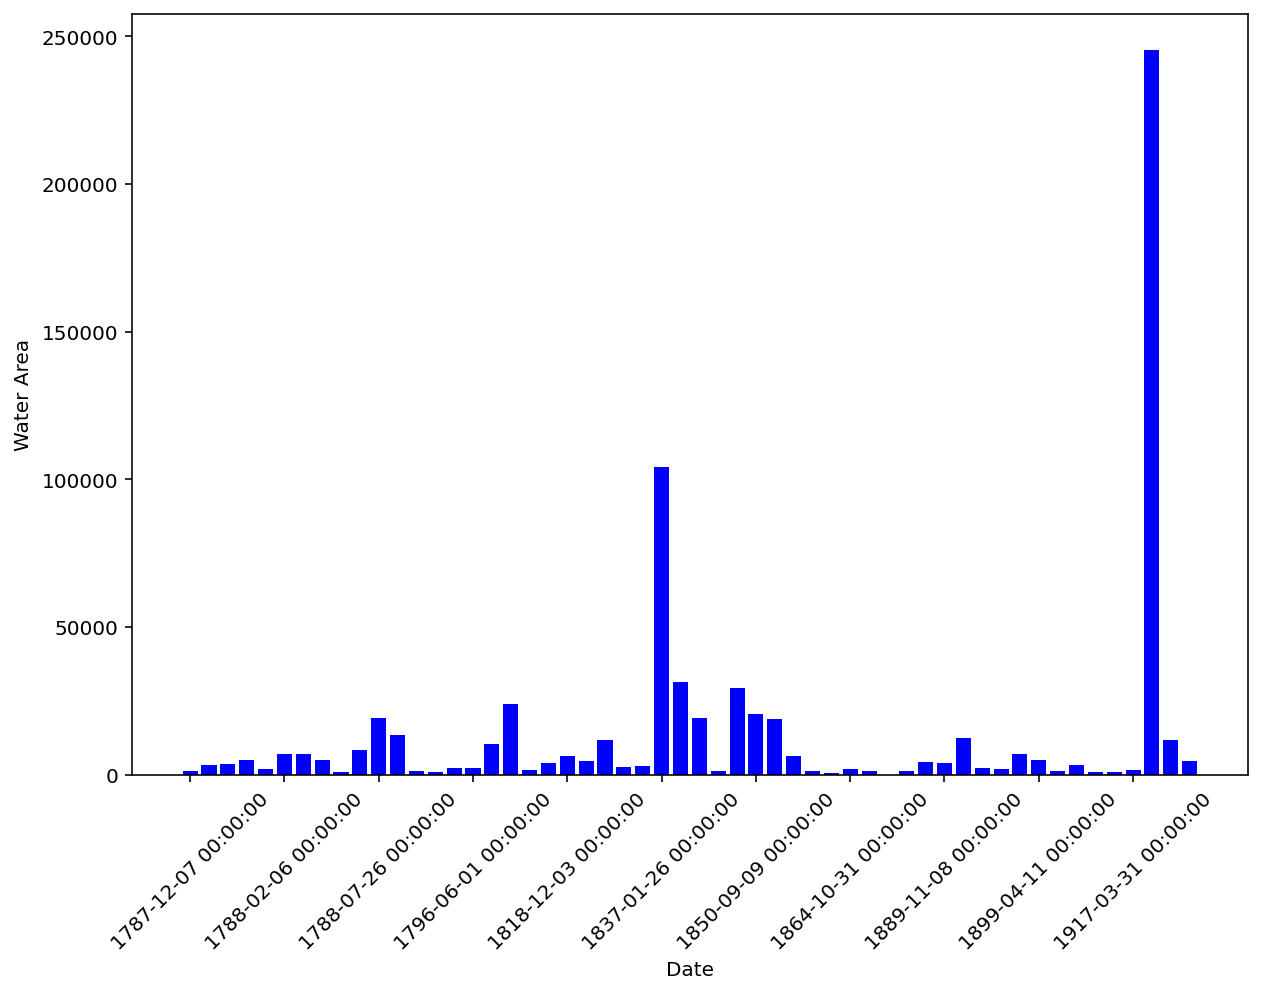

In [154]:
#Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black

import matplotlib.pyplot  as plt
import numpy as np
%config InlineBackend.figure_format ='retina' #This makes your plot clearer

values_merged = pd.merge(values,states,left_on='USPS_code',right_on='Abbreviation', how='outer')


#ld = merged.loc[merged['Date']<pd.datetime(1790,1,1)]
values_sorted = values_merged.sort_values('Date')
#values_sorted.head(5)
dates = []
for i in values_sorted['Date'].index:
    dates.append(str(values_sorted['Date'][i]))

fig = plt.figure(figsize =(10, 7))
bar = plt.bar(dates, values_sorted['Area_water'], color='blue')
plt.xticks(np.arange(0, 55, step=5), rotation = 45)
plt.ylabel('Water Area')
plt.xlabel('Date')
